In [12]:
import pandas as pd

# Load the uploaded CSV files
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test (1).csv')

# Show first few rows and basic info to understand the data
train_overview = {
    "shape": train_df.shape,
    "columns": train_df.columns.tolist(),
    "head": train_df.head(),
    "missing_values": train_df.isnull().sum().sort_values(ascending=False).head(10)
}

test_overview = {
    "shape": test_df.shape,
    "columns": test_df.columns.tolist(),
    "head": test_df.head(),
    "missing_values": test_df.isnull().sum().sort_values(ascending=False).head(10)
}

train_overview, test_overview


({'shape': (1460, 81),
  'columns': ['Id',
   'MSSubClass',
   'MSZoning',
   'LotFrontage',
   'LotArea',
   'Street',
   'Alley',
   'LotShape',
   'LandContour',
   'Utilities',
   'LotConfig',
   'LandSlope',
   'Neighborhood',
   'Condition1',
   'Condition2',
   'BldgType',
   'HouseStyle',
   'OverallQual',
   'OverallCond',
   'YearBuilt',
   'YearRemodAdd',
   'RoofStyle',
   'RoofMatl',
   'Exterior1st',
   'Exterior2nd',
   'MasVnrType',
   'MasVnrArea',
   'ExterQual',
   'ExterCond',
   'Foundation',
   'BsmtQual',
   'BsmtCond',
   'BsmtExposure',
   'BsmtFinType1',
   'BsmtFinSF1',
   'BsmtFinType2',
   'BsmtFinSF2',
   'BsmtUnfSF',
   'TotalBsmtSF',
   'Heating',
   'HeatingQC',
   'CentralAir',
   'Electrical',
   '1stFlrSF',
   '2ndFlrSF',
   'LowQualFinSF',
   'GrLivArea',
   'BsmtFullBath',
   'BsmtHalfBath',
   'FullBath',
   'HalfBath',
   'BedroomAbvGr',
   'KitchenAbvGr',
   'KitchenQual',
   'TotRmsAbvGrd',
   'Functional',
   'Fireplaces',
   'FireplaceQu',
  

In [13]:
## ✅ Next steps (Data preprocessing & feature engineering)
from sklearn.preprocessing import LabelEncoder

# Combine train and test for consistent processing
train_labels = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)

all_data = pd.concat([train_df, test_df], axis=0, sort=False)

# ===== Handling missing values =====

# Fill categorical NaNs with 'None'
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

# Fill numerical NaNs with median
for col in ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']:
    all_data[col] = all_data[col].fillna(all_data[col].median())

# Fill the rest categorical with mode (most frequent)
for col in all_data.select_dtypes(include=['object']).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# ===== Feature engineering =====

# Total square footage: basement + 1st + 2nd floors
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Age of the house
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Years since remodel
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Total number of bathrooms
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                        all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

# Has pool
all_data['HasPool'] = (all_data['PoolArea'] > 0).astype(int)

# ===== Encode categorical variables =====

# Label encode simple categorical features
cols_to_label_encode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

le = LabelEncoder()
for col in cols_to_label_encode:
    all_data[col] = le.fit_transform(all_data[col])

# ===== Split back into train and test =====
final_train = all_data.iloc[:train_df.shape[0], :]
final_test = all_data.iloc[train_df.shape[0]:, :]

# Add back target
final_train['SalePrice'] = train_labels

# Show final shape and preview
final_train.shape, final_train.head(), final_test.shape, final_test.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\3671766975.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train['SalePrice'] = train_labels


((1460, 86),
    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
 0   1          60         3         65.0     8450       1  None         3   
 1   2          20         3         80.0     9600       1  None         3   
 2   3          60         3         68.0    11250       1  None         0   
 3   4          70         3         60.0     9550       1  None         0   
 4   5          60         3         84.0    14260       1  None         0   
 
    LandContour  Utilities  ...  MoSold  YrSold  SaleType  SaleCondition  \
 0            3          0  ...       2    2008         8              4   
 1            3          0  ...       5    2007         8              4   
 2            3          0  ...       9    2008         8              4   
 3            3          0  ...       2    2006         8              0   
 4            3          0  ...      12    2008         8              4   
 
    TotalSF  HouseAge  RemodAge  TotalBath  HasPool  SalePr

In [14]:
from sklearn.preprocessing import LabelEncoder

# Just read your data
# Make sure to keep SalePrice in train_df
all_data = pd.concat([train_df, test_df], axis=0, sort=False)

# ===== Handling missing values =====
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

for col in ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']:
    all_data[col] = all_data[col].fillna(all_data[col].median())

for col in all_data.select_dtypes(include=['object']).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# ===== Feature engineering =====
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data['TotalBath'] = (all_data['FullBath'] + 0.5 * all_data['HalfBath'] +
                         all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath'])
all_data['HasPool'] = (all_data['PoolArea'] > 0).astype(int)

# ===== Encode categorical variables =====
cols_to_label_encode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

le = LabelEncoder()
for col in cols_to_label_encode:
    all_data[col] = le.fit_transform(all_data[col])

# ===== Finally: separate train & test =====
final_train = all_data.iloc[:train_df.shape[0], :]
final_test = all_data.iloc[train_df.shape[0]:, :]

# If 'SalePrice' column exists in train_df, add it to final_train
if 'SalePrice' in train_df.columns:
    final_train['SalePrice'] = train_df['SalePrice'].values

# Show shape and preview
print(final_train.shape)
print(final_train.head())
print(final_test.shape)
print(final_test.head())


(1460, 85)
   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60         3         65.0     8450       1  None         3   
1   2          20         3         80.0     9600       1  None         3   
2   3          60         3         68.0    11250       1  None         0   
3   4          70         3         60.0     9550       1  None         0   
4   5          60         3         84.0    14260       1  None         0   

   LandContour  Utilities  ...  MiscVal  MoSold  YrSold  SaleType  \
0            3          0  ...        0       2    2008         8   
1            3          0  ...        0       5    2007         8   
2            3          0  ...        0       9    2008         8   
3            3          0  ...        0       2    2006         8   
4            3          0  ...        0      12    2008         8   

   SaleCondition  TotalSF  HouseAge  RemodAge  TotalBath  HasPool  
0              4   2566.0         5        

C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\2145402229.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='viridis')


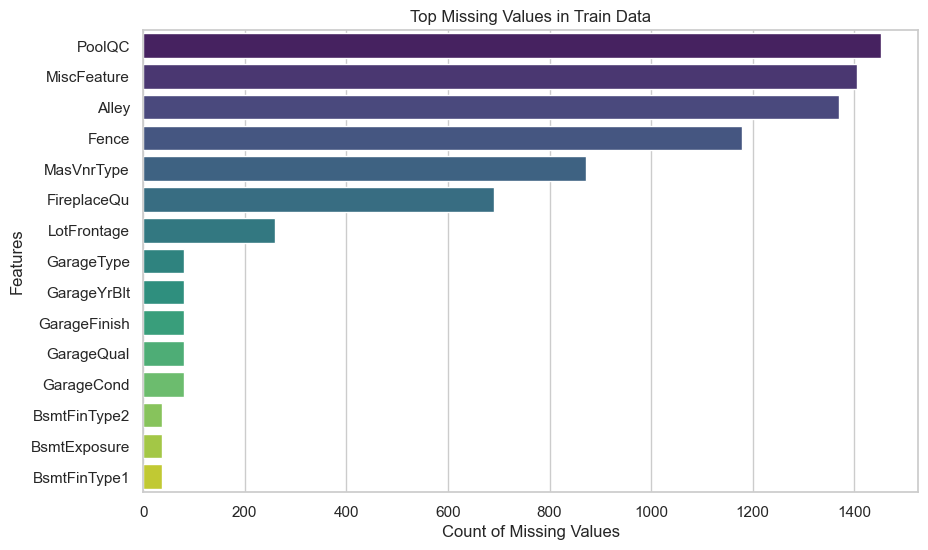

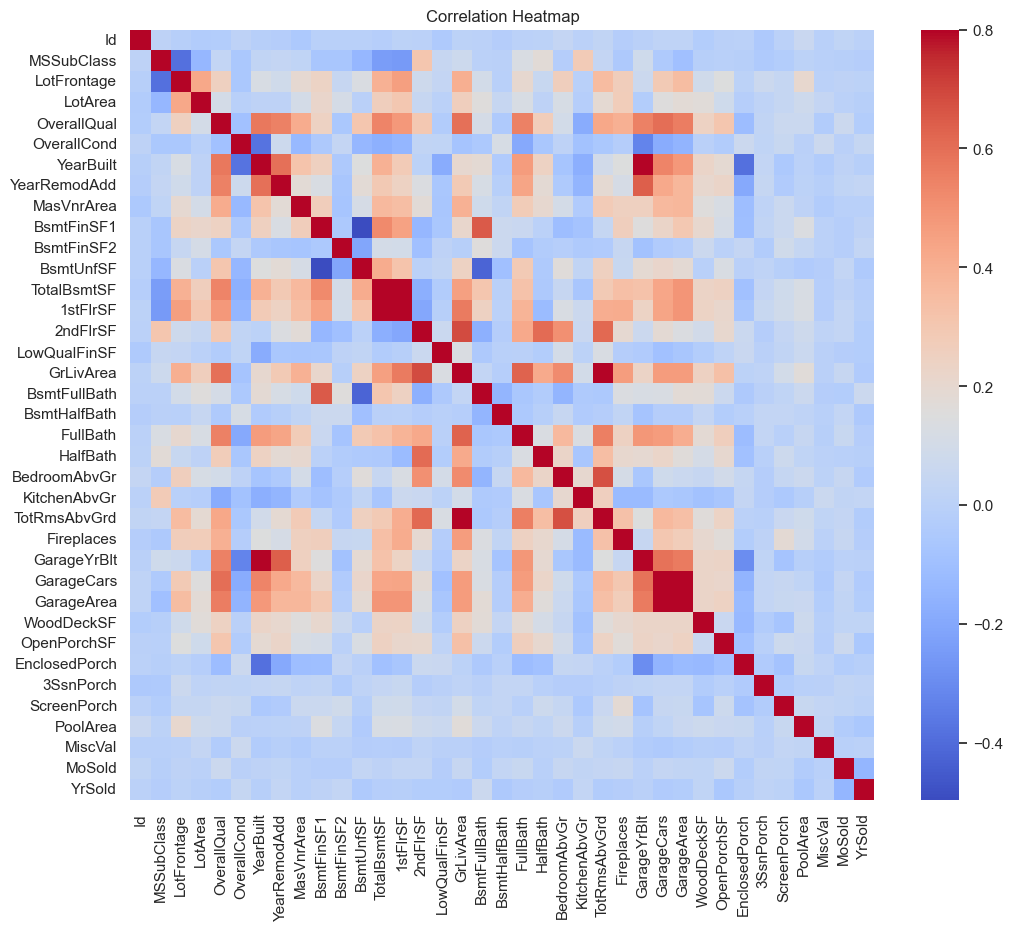

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# --- 1. Distribution of target variable (SalePrice)
if 'SalePrice' in train_df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(train_df['SalePrice'], kde=True, color='blue', bins=30)
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.show()

# --- 2. Check missing values before filling (top 15)
plt.figure(figsize=(10,6))
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)[:15]
sns.barplot(x=missing.values, y=missing.index, palette='viridis')
plt.title('Top Missing Values in Train Data')
plt.xlabel('Count of Missing Values')
plt.ylabel('Features')
plt.show()

# --- 3. Correlation heatmap (numerical features)
corr = train_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

# --- 4. SalePrice vs GrLivArea scatterplot
if 'SalePrice' in train_df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice', alpha=0.5)
    plt.title('SalePrice vs GrLivArea')
    plt.show()

# --- 5. SalePrice vs OverallQual boxplot
if 'SalePrice' in train_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=train_df, x='OverallQual', y='SalePrice', palette='Set2')
    plt.title('SalePrice vs OverallQual')
    plt.show()


